# CATBOOST

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [8]:
import catboost
from catboost import CatBoostClassifier

In [27]:
cat_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [11]:
y_pred = cat_model.predict(X_test)

In [12]:
dir(cat_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_base_virtual_ensembles_predict',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_classification_objective',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_embedding_feature_indices',
 '_get_float_feature_indices',
 '_get_params',
 '_get_tags',
 '_get_text_feature_indices',
 '_get_tree_leaf_values',
 '_get_tree

In [13]:
?cat_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x00000210A5932E80>
File:            c:\users\ertug\anaconda3\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5096471914376255

In [20]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [21]:
r2_score(y_test, y_pred)

-0.1473509933774837

In [22]:
confusion_matrix(y_test, y_pred)

array([[120,  31],
       [ 29,  51]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [24]:
cat_model.predict_proba(X_test)

array([[0.5768462 , 0.4231538 ],
       [0.9021823 , 0.0978177 ],
       [0.86191374, 0.13808626],
       [0.81662637, 0.18337363],
       [0.53196066, 0.46803934],
       [0.53764439, 0.46235561],
       [0.99757138, 0.00242862],
       [0.22867044, 0.77132956],
       [0.410762  , 0.589238  ],
       [0.49331881, 0.50668119],
       [0.77006336, 0.22993664],
       [0.09605754, 0.90394246],
       [0.81628495, 0.18371505],
       [0.7231033 , 0.2768967 ],
       [0.9837828 , 0.0162172 ],
       [0.52014912, 0.47985088],
       [0.9208321 , 0.0791679 ],
       [0.98147159, 0.01852841],
       [0.0856879 , 0.9143121 ],
       [0.52190757, 0.47809243],
       [0.57882726, 0.42117274],
       [0.95125927, 0.04874073],
       [0.71686838, 0.28313162],
       [0.97963532, 0.02036468],
       [0.37670831, 0.62329169],
       [0.04588905, 0.95411095],
       [0.93875125, 0.06124875],
       [0.98649048, 0.01350952],
       [0.96278846, 0.03721154],
       [0.8799783 , 0.1200217 ],
       [0.

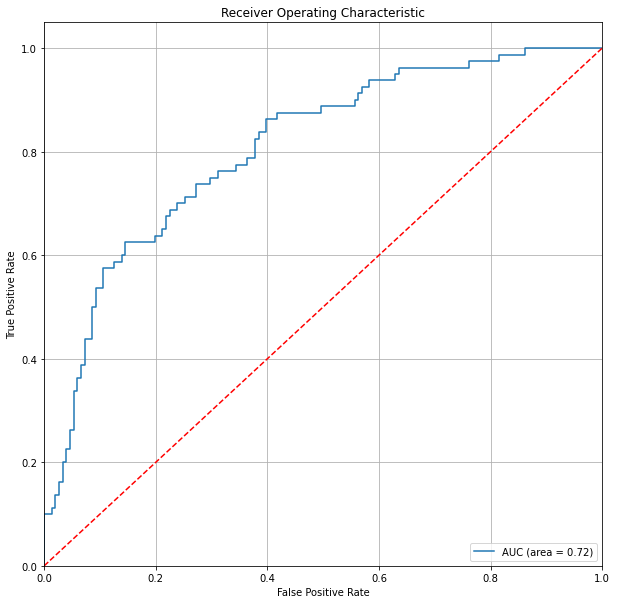

In [25]:
logit_roc_auc = roc_auc_score(y_test, cat_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cat_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

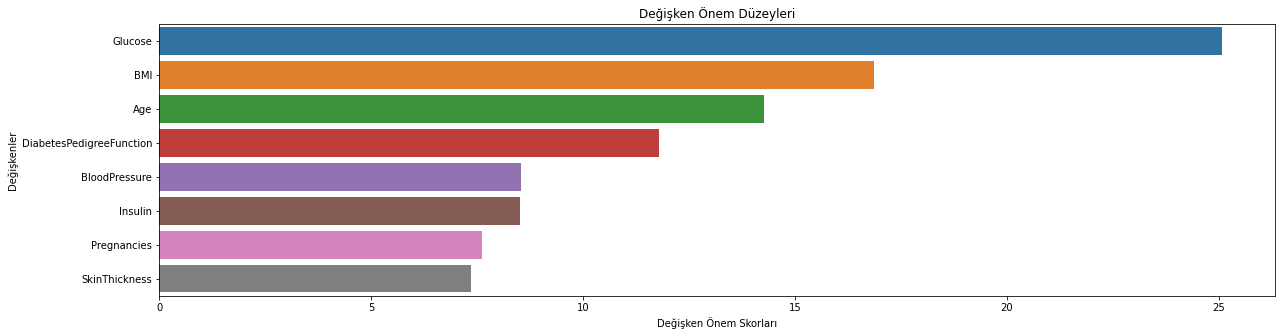

In [26]:
feature_imp = pd.Series(cat_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

### MODEL TUNING

In [28]:
cat_boost = CatBoostClassifier()

In [29]:
cat_params = {"iterations": [200, 500, 1000, 2000],
              "learning_rate": [.1, .01, .001, .0001, .00001],
              "depth": [3, 5, 8]} # "iterations"="n_estimators"
                                  # "depth"="max_depth"

In [32]:
cat_cv_model = GridSearchCV(cat_boost, cat_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 49.9min finished


0:	learn: 0.6863412	total: 23.8ms	remaining: 4.74s
1:	learn: 0.6811322	total: 35.3ms	remaining: 3.49s
2:	learn: 0.6753199	total: 46.6ms	remaining: 3.06s
3:	learn: 0.6697717	total: 58.9ms	remaining: 2.88s
4:	learn: 0.6642090	total: 72.3ms	remaining: 2.82s
5:	learn: 0.6577038	total: 83.9ms	remaining: 2.71s
6:	learn: 0.6522290	total: 109ms	remaining: 3s
7:	learn: 0.6466015	total: 126ms	remaining: 3.03s
8:	learn: 0.6408068	total: 141ms	remaining: 2.98s
9:	learn: 0.6358218	total: 162ms	remaining: 3.08s
10:	learn: 0.6300444	total: 173ms	remaining: 2.97s
11:	learn: 0.6240992	total: 189ms	remaining: 2.96s
12:	learn: 0.6196618	total: 216ms	remaining: 3.11s
13:	learn: 0.6149237	total: 227ms	remaining: 3.02s
14:	learn: 0.6093146	total: 238ms	remaining: 2.94s
15:	learn: 0.6047282	total: 269ms	remaining: 3.09s
16:	learn: 0.6013242	total: 279ms	remaining: 3s
17:	learn: 0.5958624	total: 288ms	remaining: 2.91s
18:	learn: 0.5903733	total: 313ms	remaining: 2.98s
19:	learn: 0.5866505	total: 326ms	remaini

In [33]:
cat_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [34]:
cat_cv_model.best_score_

0.7764849755415792

In [35]:
cat_tuned = CatBoostClassifier(iterations=cat_cv_model.best_params_.get("iterations"),
                               learning_rate=cat_cv_model.best_params_.get("learning_rate"),
                               depth=cat_cv_model.best_params_.get("depth"),).fit(X_train, 
                                                                                  y_train)

0:	learn: 0.6863412	total: 12.6ms	remaining: 2.51s
1:	learn: 0.6811322	total: 23.3ms	remaining: 2.31s
2:	learn: 0.6753199	total: 93.6ms	remaining: 6.14s
3:	learn: 0.6697717	total: 104ms	remaining: 5.1s
4:	learn: 0.6642090	total: 117ms	remaining: 4.56s
5:	learn: 0.6577038	total: 129ms	remaining: 4.16s
6:	learn: 0.6522290	total: 193ms	remaining: 5.31s
7:	learn: 0.6466015	total: 203ms	remaining: 4.86s
8:	learn: 0.6408068	total: 212ms	remaining: 4.49s
9:	learn: 0.6358218	total: 222ms	remaining: 4.22s
10:	learn: 0.6300444	total: 243ms	remaining: 4.18s
11:	learn: 0.6240992	total: 273ms	remaining: 4.28s
12:	learn: 0.6196618	total: 285ms	remaining: 4.1s
13:	learn: 0.6149237	total: 297ms	remaining: 3.94s
14:	learn: 0.6093146	total: 308ms	remaining: 3.8s
15:	learn: 0.6047282	total: 351ms	remaining: 4.03s
16:	learn: 0.6013242	total: 366ms	remaining: 3.94s
17:	learn: 0.5958624	total: 381ms	remaining: 3.85s
18:	learn: 0.5903733	total: 396ms	remaining: 3.77s
19:	learn: 0.5866505	total: 409ms	remaini

In [36]:
y_pred = cat_tuned.predict(X_test)

In [37]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.496742636335202

In [38]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [39]:
r2_score(y_test, y_pred)

-0.08998344370860956

In [40]:
confusion_matrix(y_test, y_pred)

array([[126,  25],
       [ 32,  48]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [42]:
cat_tuned.predict_proba(X_test)

array([[0.58528183, 0.41471817],
       [0.82621096, 0.17378904],
       [0.83913573, 0.16086427],
       [0.78475871, 0.21524129],
       [0.50503697, 0.49496303],
       [0.56424302, 0.43575698],
       [0.97282589, 0.02717411],
       [0.47101894, 0.52898106],
       [0.39651853, 0.60348147],
       [0.40489928, 0.59510072],
       [0.72427099, 0.27572901],
       [0.21745864, 0.78254136],
       [0.65374602, 0.34625398],
       [0.67757209, 0.32242791],
       [0.93802104, 0.06197896],
       [0.5484709 , 0.4515291 ],
       [0.86515372, 0.13484628],
       [0.91853016, 0.08146984],
       [0.28663905, 0.71336095],
       [0.45303532, 0.54696468],
       [0.61189497, 0.38810503],
       [0.88757254, 0.11242746],
       [0.64910214, 0.35089786],
       [0.93645929, 0.06354071],
       [0.45998697, 0.54001303],
       [0.14731801, 0.85268199],
       [0.87481986, 0.12518014],
       [0.95617994, 0.04382006],
       [0.87223213, 0.12776787],
       [0.76200091, 0.23799909],
       [0.

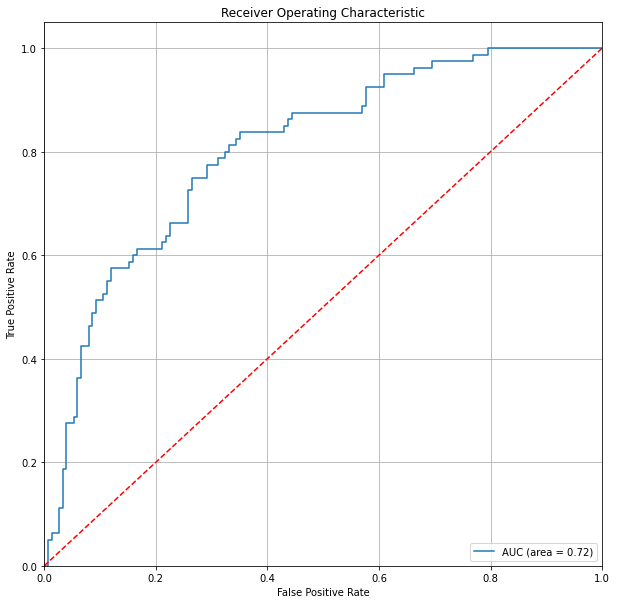

In [46]:
logit_roc_auc = roc_auc_score(y_test, cat_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cat_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

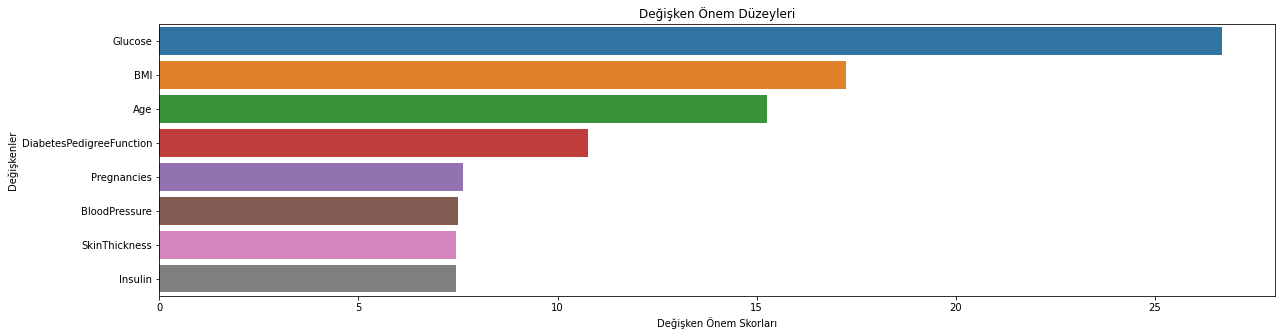

In [47]:
feature_imp = pd.Series(cat_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");